In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To display all columns
pd.pandas.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("Car data.csv")

In [3]:
data.shape

(8128, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
data.drop(["torque"],axis=1, inplace=True)

In [7]:
data.shape

(8128, 12)

In [8]:
#Dropping the duplicated Rows
data = data.drop_duplicates()
data.shape

(6926, 12)

### EDA

#### Missing values

In [9]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

In [10]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4), "% missing values")

mileage 0.03 % missing values
engine 0.03 % missing values
max_power 0.0296 % missing values
seats 0.03 % missing values


Since , there are missing values. We need to find relationship between missing values and selling_price. Let's plot some diagram for this relationship.

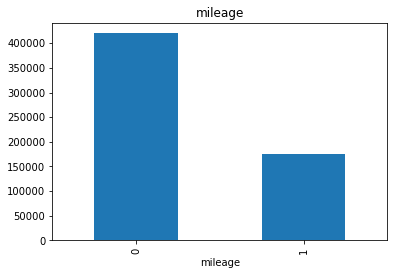

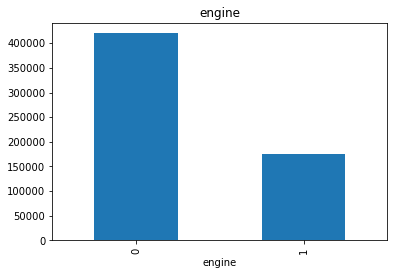

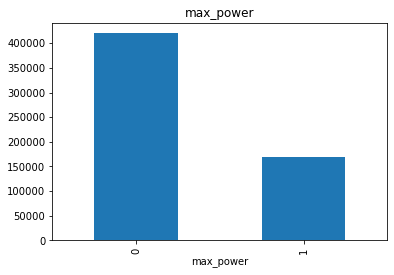

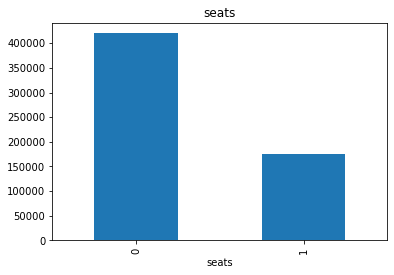

In [11]:
for feature in features_with_na:
    data1 = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data1[feature] = np.where(data1[feature].isnull(),1,0)
    
    # let's calculate the mean selling_price where the information is missing or present
    data1.groupby(feature)['selling_price'].median().plot.bar()
    plt.title(feature)
    plt.show()
    


### Numerical variables

In [12]:
#List of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]

print("Number of numerical variables: ", len(numerical_features))

data[numerical_features].head()

Number of numerical variables:  4


,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [13]:
# Numerical variables are usually of 2 type
# Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]

print("discrete features are: ", len(discrete_features))

discrete features are:  1


In [14]:
discrete_features

['seats']

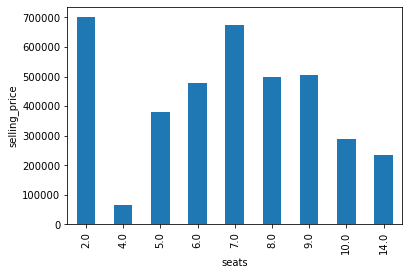

In [15]:
# Lets Find the realtionship between them and selling_price
for feature in discrete_features:
    data1 = data.copy()
    data.groupby(feature)["selling_price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("selling_price")
    plt.show()

### Continuous variable

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Number pf continuous features: ", len(continuous_features))

Number pf continuous features:  3


In [17]:
data[continuous_features].head()

,year,selling_price,km_driven
0,2014,450000,145500
1,2014,370000,120000
2,2006,158000,140000
3,2010,225000,127000
4,2007,130000,120000


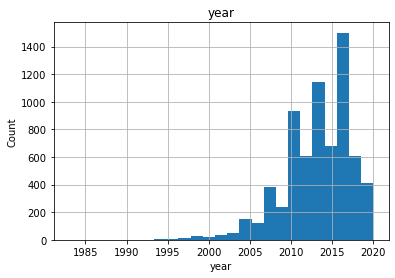

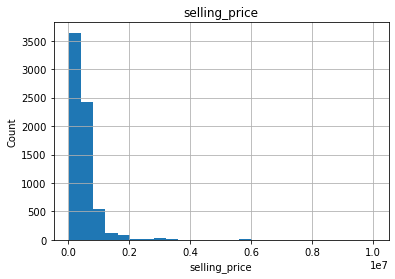

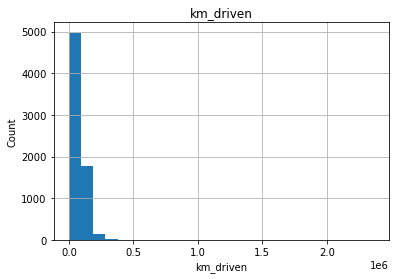

In [18]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data1 = data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers

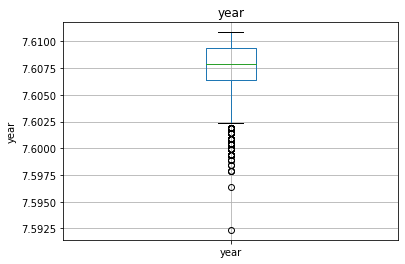

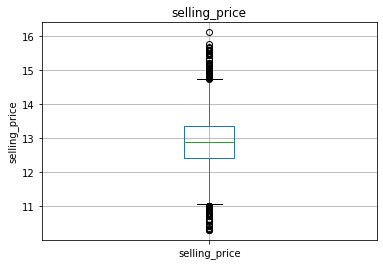

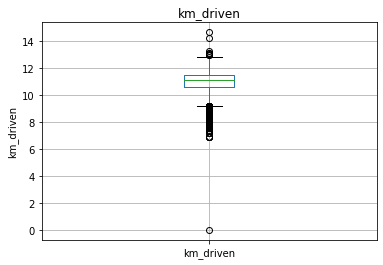

In [19]:
for feature in continuous_features:
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])
        data1.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)

        plt.show()

### Categorical variables

In [20]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
categorical_features

['name',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power']

In [21]:
data[categorical_features].head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp


In [22]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature, len(data[feature].unique())))

The feature is name and number of categories are 2058
The feature is fuel and number of categories are 4
The feature is seller_type and number of categories are 3
The feature is transmission and number of categories are 2
The feature is owner and number of categories are 5
The feature is mileage and number of categories are 394
The feature is engine and number of categories are 122
The feature is max_power and number of categories are 323


### Feature Engineering

### Handling Missing Values

In [23]:
data["seats"].value_counts()

5.0     5254
7.0      966
8.0      222
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [24]:
data["seats"].mode()

0    5.0
dtype: float64

In [25]:
data["seats"] = data["seats"].fillna(data["seats"].mode()[0])
# filling the null values in the 'seats' dataset with mode of that column
# we cannot take mean of this column because it contains discrete vlaues 

In [26]:
# filling all the null values in mileage column with 0 kmpl for now
data["mileage"] = data["mileage"].fillna("0 kmpl")

In [27]:
# filling all the null values in engine column with 0 CC for now
data["engine"] = data["engine"].fillna("0 CC")

In [28]:
# filling all the null values in mileage column with 0 bhp for now
data["max_power"] = data["max_power"].fillna("0 bhp")

In [29]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [30]:
data.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [31]:
mil = "23.4 kmpl"
val = mil.split(" ")
val1 = val[0]
val1

'23.4'

In [32]:
def mileage_fun(mil):
    val = mil.split(" ")
    val1 = val[0]
    return val1

In [33]:
data["mileage"] = data["mileage"].apply(mileage_fun)

In [34]:
data["mileage"]

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8121     18.9
8122    22.54
8123     18.5
8124     16.8
8125     19.3
Name: mileage, Length: 6926, dtype: object

In [35]:
data["mileage"] = data["mileage"].astype(float)

In [36]:
data["mileage"]

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8121    18.90
8122    22.54
8123    18.50
8124    16.80
8125    19.30
Name: mileage, Length: 6926, dtype: float64

In [37]:
def engine_fun(mil):
    val = mil.split(" ")
    val1 = val[0]
    return val1

In [38]:
data["engine"] = data["engine"].apply(engine_fun)
data["engine"] = data["engine"].astype(int)
data["engine"]

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8121     998
8122    1396
8123    1197
8124    1493
8125    1248
Name: engine, Length: 6926, dtype: int32

In [39]:
def max_power_fun(mil):
    val = mil.split(" ")
    val1 = val[0]
    return val1

In [40]:
data["max_power"] = data["max_power"].apply(max_power_fun)
data = data.drop("max_power", axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6926 non-null   float64
 9   engine         6926 non-null   int32  
 10  seats          6926 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 622.3+ KB


In [42]:
data.loc[data["year"] > 2010]
# data of all the car brought after 2010

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,5.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8118,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.50,1197,5.0
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51,998,5.0
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,5.0


In [43]:
mil_after_2010 = data["mileage"].loc[data["year"] > 2010]
mil_after_2010
# mileage of cars brought after 2010

0       23.40
1       21.14
5       20.14
8       23.59
9       20.00
        ...  
8118    18.50
8119    20.51
8121    18.90
8122    22.54
8123    18.50
Name: mileage, Length: 5501, dtype: float64

In [44]:
mil_before_2010 = data["mileage"].loc[data["year"] < 2010]
mil_before_2010
# mileage of cars brought before 2010

2       17.70
4       16.10
6       17.30
7       16.10
11      17.30
        ...  
8105    13.00
8115    16.10
8120    17.92
8124    16.80
8125    19.30
Name: mileage, Length: 1045, dtype: float64

you can see a trend that cars brought after 2010 has mileage 20 or above and cars bought before 2010 has mileage below 20 so we can replace the 0 values by taking the means of mileage of the cars bought before and after 2010

In [45]:
# mean of the mileage of the cars bought before 2010
mil_before_2010_mean = data["mileage"].loc[data["year"] < 2010].mean()
mil_before_2010_mean = round(mil_before_2010_mean,2)
mil_before_2010_mean

14.46

In [46]:
# mean of the mileage of the cars bought after 2010
mil_after_2010_mean = data["mileage"].loc[data["year"] > 2010].mean()
mil_after_2010_mean = round(mil_after_2010_mean,2)
mil_after_2010_mean

19.87

Now we will try and replace the nan values in the mileage column that we raplced with zero. so we wil try and replace the 0 values in the mileage column depending on the year the car was brought

In [47]:
mil_zero = data["mileage"].loc[data["mileage"] == 0]
mil_zero

13      0.0
31      0.0
78      0.0
87      0.0
119     0.0
       ... 
7740    0.0
7996    0.0
8009    0.0
8068    0.0
8103    0.0
Name: mileage, Length: 223, dtype: float64

In [48]:
mil_zero = data.loc[data["mileage"] == 0]
mil_zero
#rows with mileage == 0

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,0.0,0,5.0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0.0,0,5.0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,0.0,0,5.0
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0.0,0,5.0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,0.0,0,5.0
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,0.0,0,5.0
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,0.0,0,5.0
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,0.0,0,5.0


In [49]:
mil_zero_before_2010 = mil_zero["mileage"].loc[mil_zero["year"] <= 2010]
mil_zero_before_2010
# rows with mileage == 0 and year < 2010

13      0.0
31      0.0
78      0.0
119     0.0
206     0.0
       ... 
7730    0.0
7740    0.0
7996    0.0
8009    0.0
8103    0.0
Name: mileage, Length: 154, dtype: float64

In [50]:
mil_zero_before_2010_keys = mil_zero_before_2010.keys()
mil_zero_before_2010_keys

Int64Index([  13,   31,   78,  119,  206,  228,  252,  306,  316,  336,
            ...
            7433, 7437, 7528, 7581, 7582, 7730, 7740, 7996, 8009, 8103],
           dtype='int64', length=154)

In [51]:
mil_zero_after_2010 = mil_zero['mileage'].loc[mil_zero["year"] > 2010]
mil_zero_after_2010

87      0.0
138     0.0
200     0.0
390     0.0
575     0.0
       ... 
7337    0.0
7373    0.0
7454    0.0
7651    0.0
8068    0.0
Name: mileage, Length: 69, dtype: float64

In [52]:
mil_zero_after_2010_keys = mil_zero_after_2010.keys()
mil_zero_after_2010_keys

Int64Index([  87,  138,  200,  390,  575,  725,  747, 1015, 1185, 1200, 1347,
            1391, 1442, 1512, 1637, 1651, 1676, 1747, 1809, 1921, 1956, 2105,
            2124, 2137, 2149, 2188, 2273, 2285, 2356, 2388, 2549, 2551, 2682,
            2725, 2942, 3062, 3173, 3194, 3281, 3365, 3397, 3456, 3597, 3813,
            4433, 4571, 4703, 5271, 5407, 5673, 5699, 5811, 5843, 5846, 5900,
            5901, 6099, 6100, 6629, 6651, 6824, 6934, 7086, 7302, 7337, 7373,
            7454, 7651, 8068],
           dtype='int64')

In [53]:
data["mileage"].loc[mil_zero_before_2010_keys] = data["mileage"].loc[mil_zero_before_2010_keys].replace(0.0, mil_before_2010_mean)
#rows with mileage = 0 and year < 2010
#replacing 0.0 with mil_before_2010_mean

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
data.loc[mil_zero_before_2010_keys]
#values are replaced

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,14.46,0,5.0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,14.46,0,5.0
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7730,Maruti Omni E 8 Str STD,2008,125000,70000,Petrol,Individual,Manual,Fourth & Above Owner,14.46,0,5.0
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0


In [55]:
data.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,5.0


In [56]:
mil_zero_after_2010 = mil_zero.loc[mil_zero['year'] > 2010]
mil_zero_after_2010
# rows with mileage = 0.0 and year > 2010

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0.0,0,5.0
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,0.0,0,5.0
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,0.0,0,5.0
390,Toyota Etios Liva Diesel TRD Sportivo,2012,265000,162000,Diesel,Individual,Manual,Third Owner,0.0,0,5.0
575,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7337,Mercedes-Benz GLC 220d 4MATIC,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,0.0,1950,5.0
7373,Maruti Swift VDI BSIV W ABS,2016,595000,77321,Diesel,Dealer,Manual,First Owner,0.0,0,5.0
7454,Ford Figo Aspire Facelift,2018,624000,14681,Diesel,Dealer,Manual,First Owner,0.0,0,5.0
7651,Maruti Swift VDI BSIV,2014,217000,50000,Diesel,Individual,Manual,First Owner,0.0,0,5.0


In [57]:
data["mileage"].loc[mil_zero_after_2010_keys] = data["mileage"].loc[mil_zero_after_2010_keys].replace(0.0, mil_after_2010_mean)
#rows with mileage = 0 and year < 2010
#replacing 0.0 with mil_before_2010_mean

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
data.loc[mil_zero_after_2010_keys]
#values are replaced

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,19.87,0,5.0
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,19.87,0,5.0
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,19.87,0,5.0
390,Toyota Etios Liva Diesel TRD Sportivo,2012,265000,162000,Diesel,Individual,Manual,Third Owner,19.87,0,5.0
575,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.87,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7337,Mercedes-Benz GLC 220d 4MATIC,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,19.87,1950,5.0
7373,Maruti Swift VDI BSIV W ABS,2016,595000,77321,Diesel,Dealer,Manual,First Owner,19.87,0,5.0
7454,Ford Figo Aspire Facelift,2018,624000,14681,Diesel,Dealer,Manual,First Owner,19.87,0,5.0
7651,Maruti Swift VDI BSIV,2014,217000,50000,Diesel,Individual,Manual,First Owner,19.87,0,5.0


In [59]:
data.loc[data["engine"] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,14.46,0,5.0
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,19.87,0,5.0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,14.46,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,14.46,0,5.0
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,19.87,0,5.0


In [60]:
data["engine"].median()

1248.0

In [61]:
data["engine"].loc[data["engine"] == 0] =data["engine"].loc[data["engine"] == 0].replace(0, data["engine"].median())

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
data.loc[data["engine"] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats


In [63]:
#converting the datatype of seats to int as seats cannot be float
data["seats"] = data["seats"].astype(int)

In [64]:
data["year"].value_counts()

2017    808
2016    693
2015    681
2018    608
2012    604
2014    581
2013    562
2011    554
2010    380
2019    347
2009    240
2008    205
2007    176
2006    123
2005     91
2020     63
2004     60
2003     47
2002     26
2000     20
1999     17
1997     11
1998     10
2001      9
1996      3
1994      3
1995      2
1983      1
1991      1
Name: year, dtype: int64

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

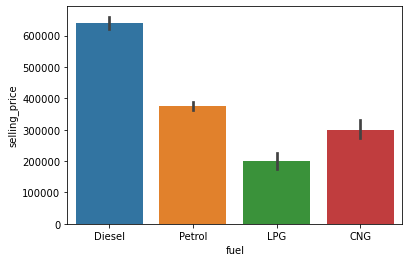

In [65]:
sns.barplot("fuel", "selling_price", data=data)
# Diesel cars are costlier than other cars

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

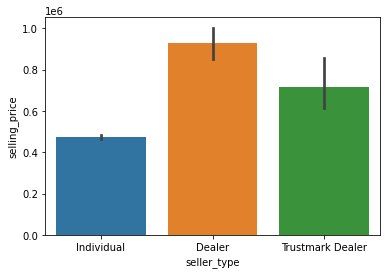

In [66]:
sns.barplot("seller_type", "selling_price", data=data)
# cars sold by Dealers are costlier

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

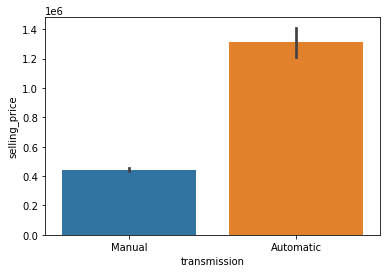

In [67]:
sns.barplot("transmission","selling_price", data=data)
#Automatic cars are costlier than manual cars

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


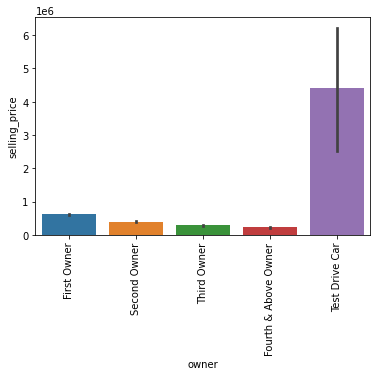

In [68]:
sns.barplot("owner", "selling_price", data=data)
plt.xticks(rotation = 90)
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


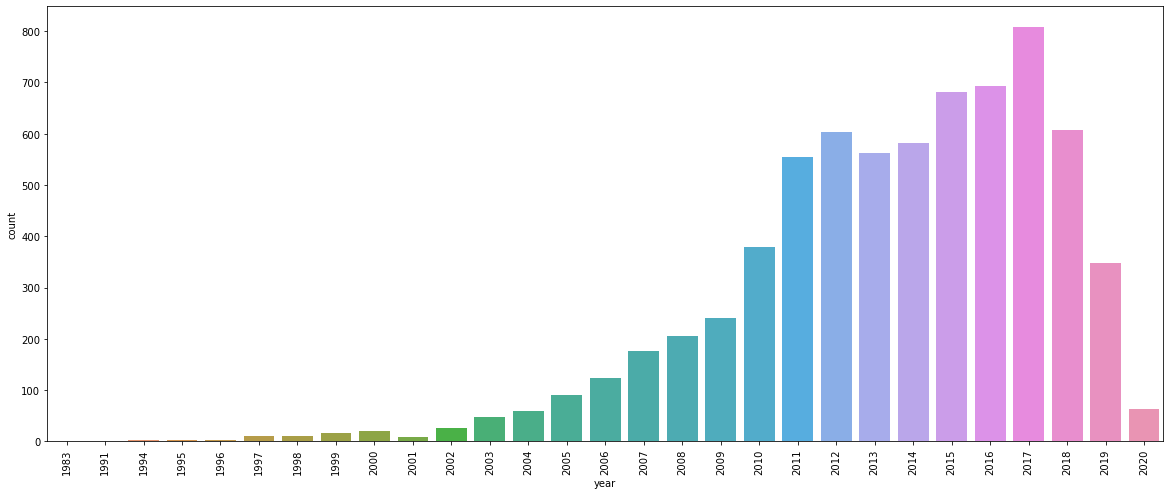

In [69]:
plt.figure(figsize=(20,8))
sns.countplot(data["year"])
plt.xticks(rotation=90)
plt.show()
# majority cars present on the site were brought in the year 2017

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

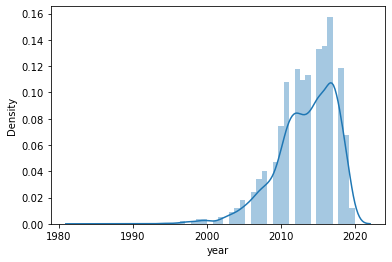

In [70]:
sns.distplot(data["year"])

In [71]:
seller_type_count = data["seller_type"].value_counts()
seller_type_count
# Seller_Type - Defines whether the seller is a dealer or an individual.

Individual          6218
Dealer               681
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [72]:
labels = seller_type_count.keys()
labels

Index(['Individual', 'Dealer', 'Trustmark Dealer'], dtype='object')

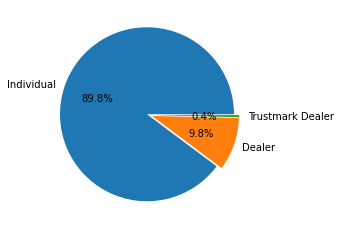

In [73]:
plt.pie(seller_type_count, labels=labels, autopct="%0.1f%%", explode=[0.03]*3)
plt.show()
# majority car sellers are individuals

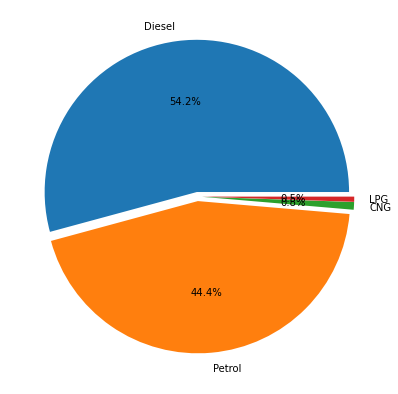

In [74]:
plt.figure(figsize = (10,7))
fuel_type = data['fuel'].value_counts()

labels = fuel_type.keys()
labels


plt.pie(fuel_type, labels = labels, autopct = '%0.1f%%', explode = [0.03]*4)
plt.show()
# 54.2% of cars present on the site have fuel type - diesel
# 44.4% of cars present on the site have fuel type - petrol

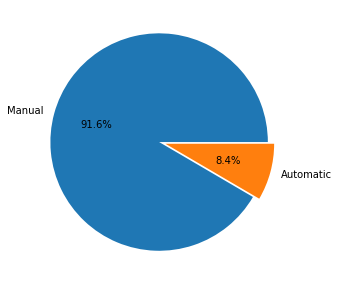

In [75]:
plt.figure(figsize = (5,5))
trans = data['transmission'].value_counts()

labels = trans.keys()
#labels

plt.pie(trans, labels = labels, autopct = '%0.1f%%', explode = [0.03]*2)
plt.show()
# 91.6% of cars present on the site are manual
# 8.4% of cars present on the site are automatic

Index(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner',
       'Test Drive Car'],
      dtype='object')


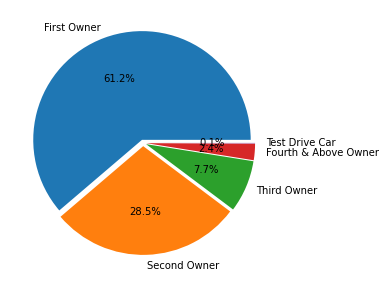

In [76]:
plt.figure(figsize = (5,5))
owner = data['owner'].value_counts()

labels = owner.keys()
print(labels)

plt.pie(owner, labels = labels, autopct = '%0.1f%%', explode = [0.03]*5)
plt.show()

# 61.2% cars on the site have 1 prvious owner
# 28.5% cars on the site have 2 previous owners
# % of test drive cars are very rare

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seats', ylabel='count'>

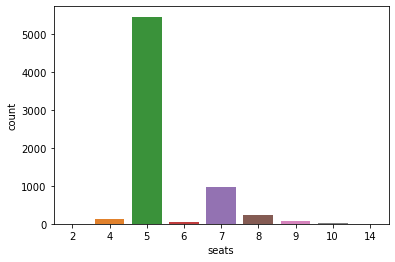

In [77]:
sns.countplot(data["seats"])
# majority cars are 5 seater

In [78]:
data["name"].value_counts()

Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Mahindra KUV 100 G80 K4 Plus                      1
Hyundai Getz 1.1 GVS                              1
Maruti 800 EX BSII                                1
Datsun GO T Option                                1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 2058, dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6926 non-null   float64
 9   engine         6926 non-null   int32  
 10  seats          6926 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 853.2+ KB


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

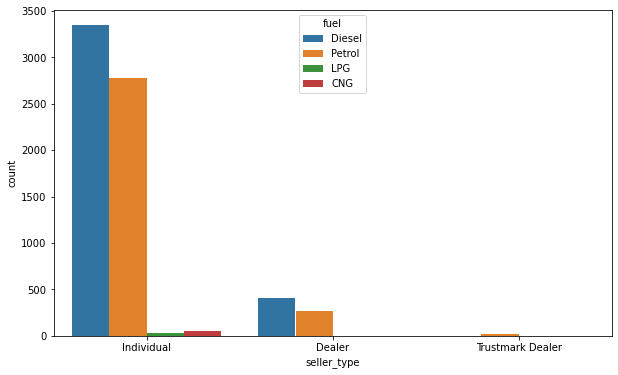

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data["seller_type"], hue = data["fuel"])
# individual sellers mostly sell cars of fuel type diesel and petrol

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

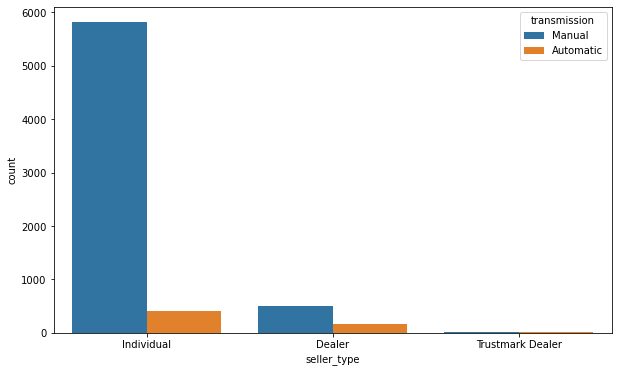

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(data["seller_type"], hue= data["transmission"])
# all the seller types prefers selling manual cars

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

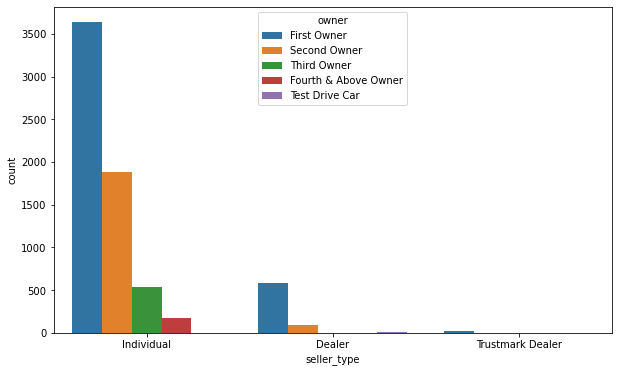

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data["seller_type"], hue = data["owner"])


In [83]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

In [84]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,5


In [85]:
data["selling_price"].min()

29999

In [86]:
data["selling_price"].max()

10000000

In [87]:
data["selling_price"] = data["selling_price"].astype(float)

In [88]:
data["selling_price"] = data["selling_price"].apply(lambda x:x/10000)

In [89]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,45.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248,5
1,Skoda Rapid 1.5 TDI Ambition,2014,37.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5
2,Honda City 2017-2020 EXi,2006,15.8,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,5
3,Hyundai i20 Sportz Diesel,2010,22.5,127000,Diesel,Individual,Manual,First Owner,23.00,1396,5
4,Maruti Swift VXI BSIII,2007,13.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298,5


### Handling categorical data

In [90]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [91]:
owner_col = {'First Owner' : 1, 'Second Owner' : 2, 'Third Owner' : 3,
       'Fourth & Above Owner' : 4, 'Test Drive Car' : 0}

In [92]:
data["owner"] = data["owner"].map(owner_col)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,45.0,145500,Diesel,Individual,Manual,1,23.40,1248,5
1,Skoda Rapid 1.5 TDI Ambition,2014,37.0,120000,Diesel,Individual,Manual,2,21.14,1498,5
2,Honda City 2017-2020 EXi,2006,15.8,140000,Petrol,Individual,Manual,3,17.70,1497,5
3,Hyundai i20 Sportz Diesel,2010,22.5,127000,Diesel,Individual,Manual,1,23.00,1396,5
4,Maruti Swift VXI BSIII,2007,13.0,120000,Petrol,Individual,Manual,1,16.10,1298,5
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,26.0,50000,Petrol,Individual,Manual,2,18.90,998,5
8122,Hyundai i20 Magna 1.4 CRDi,2014,47.5,80000,Diesel,Individual,Manual,2,22.54,1396,5
8123,Hyundai i20 Magna,2013,32.0,110000,Petrol,Individual,Manual,1,18.50,1197,5
8124,Hyundai Verna CRDi SX,2007,13.5,119000,Diesel,Individual,Manual,4,16.80,1493,5


For 'name', 'fuel', 'seller_type', 'transmission' columns We can use LabelEncoding

In [93]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [94]:
cat = ['name', 'fuel', 'seller_type', 'transmission']

In [95]:
data["name"].value_counts()

Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Mahindra KUV 100 G80 K4 Plus                      1
Hyundai Getz 1.1 GVS                              1
Maruti 800 EX BSII                                1
Datsun GO T Option                                1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 2058, dtype: int64

In [96]:
data["fuel"].value_counts()

Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: fuel, dtype: int64

In [97]:
data["seller_type"].value_counts()

Individual          6218
Dealer               681
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [98]:
data["transmission"].value_counts()

Manual       6342
Automatic     584
Name: transmission, dtype: int64

In [99]:
for i in cat:
    #print(i)
    data[i] = label_enc.fit_transform(data[i])
    print(i, label_enc.classes_)

name ['Ambassador CLASSIC 1500 DSL AC' 'Ambassador Classic 2000 DSZ AC PS'
 'Ambassador Grand 1500 DSZ BSIII' ... 'Volvo XC40 D4 R-Design'
 'Volvo XC60 Inscription D5 BSIV' 'Volvo XC90 T8 Excellence BSIV']
fuel ['CNG' 'Diesel' 'LPG' 'Petrol']
seller_type ['Dealer' 'Individual' 'Trustmark Dealer']
transmission ['Automatic' 'Manual']


In [100]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,1307,2014,45.0,145500,1,1,1,1,23.40,1248,5
1,1607,2014,37.0,120000,1,1,1,2,21.14,1498,5
2,385,2006,15.8,140000,3,1,1,3,17.70,1497,5
3,781,2010,22.5,127000,1,1,1,1,23.00,1396,5
4,1349,2007,13.0,120000,3,1,1,1,16.10,1298,5
...,...,...,...,...,...,...,...,...,...,...,...
8121,1409,2013,26.0,50000,3,1,1,2,18.90,998,5
8122,773,2014,47.5,80000,1,1,1,2,22.54,1396,5
8123,771,2013,32.0,110000,3,1,1,1,18.50,1197,5
8124,656,2007,13.5,119000,1,1,1,4,16.80,1493,5


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   int32  
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   float64
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   int32  
 5   seller_type    6926 non-null   int32  
 6   transmission   6926 non-null   int32  
 7   owner          6926 non-null   int64  
 8   mileage        6926 non-null   float64
 9   engine         6926 non-null   int32  
 10  seats          6926 non-null   int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 745.0 KB


### Checking for collinearity

<AxesSubplot:>

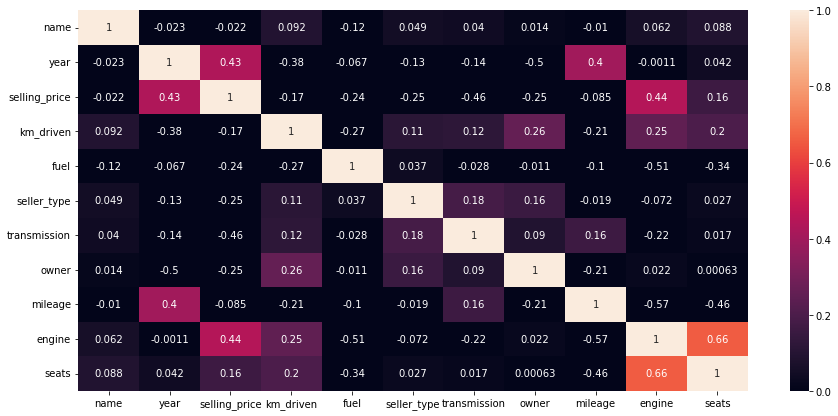

In [102]:
#using Heatmap

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True)

In [103]:
x = data.drop(["selling_price", "name"], axis=1).copy()
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,145500,1,1,1,1,23.40,1248,5
1,2014,120000,1,1,1,2,21.14,1498,5
2,2006,140000,3,1,1,3,17.70,1497,5
3,2010,127000,1,1,1,1,23.00,1396,5
4,2007,120000,3,1,1,1,16.10,1298,5


In [104]:
y = data["selling_price"].copy()
y.head()

0    45.0
1    37.0
2    15.8
3    22.5
4    13.0
Name: selling_price, dtype: float64

In [105]:
print(x.shape)
print(y.shape)

(6926, 9)
(6926,)


### Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)


In [108]:
x_scaled.shape


(6926, 9)

In [109]:
x_scaled


array([[ 0.14215322,  1.22535676, -0.88339674, ...,  1.01156281,
        -0.36427469, -0.43369973],
       [ 0.14215322,  0.78836783, -0.88339674, ...,  0.44000052,
         0.14908097, -0.43369973],
       [-1.81959662,  1.13110424,  1.11086852, ..., -0.42998808,
         0.14702755, -0.43369973],
       ...,
       [-0.10306551,  0.61699963,  1.11086852, ..., -0.22766515,
        -0.46899924, -0.43369973],
       [-1.57437789,  0.77123101, -0.88339674, ..., -0.65760138,
         0.13881386, -0.43369973],
       [-1.08394043,  0.78836783, -0.88339674, ..., -0.02534222,
        -0.36427469, -0.43369973]])

### Splitting the data into train and test set

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [112]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5540, 9)
(5540,)
(1386, 9)
(1386,)


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
Rand_for = RandomForestRegressor(n_estimators=5,random_state=1)
Rand_for.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=1)

In [115]:
ypred = Rand_for.predict(x_test)

In [116]:
from sklearn.metrics import r2_score
res = r2_score(y_test, ypred)
res*100

82.45494969409947

In [117]:
df_rf = pd.DataFrame({'Actual':y_test,"Predicted":ypred})
df_rf.head(10)

,Actual,Predicted
1173,20.4999,25.299960
942,12.0000,9.180000
4282,20.0000,14.200000
313,53.5000,37.100000
5397,42.5000,43.039940
6343,40.0000,68.800000
6309,37.0000,35.400000
3678,27.0000,25.600000
5381,57.5000,57.500000
5215,50.0000,55.333333


In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
dec_reg = DecisionTreeRegressor(random_state=1)
dec_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [120]:
y_pred = dec_reg.predict(x_test)

In [121]:
result_r2 = r2_score(y_test, y_pred)
result_r2*100

63.94290335628644

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [124]:
y_pred = lin_reg.predict(x_test)

In [125]:
r2_score(y_test,y_pred)

0.4309841922790575